# to do
## Предсказывать колонку Target

1) Заполнить пропуски в датасете
2) Нормализовать те колонки, которые нужно (сочтешь необходимым)
3) Визуализировать данные (бонус: попробовать понижение размерности PCA, T-SNE) понизить до 2Д и отобразить на графике, цветом пометить классы
4) Попробовать разные модели МЛ и подобрать метрику по которой будешь сравнивать
5) Сделать выводы, представить результаты

*Метрики: Accuracy, Recall, F1, AUC*


# done 
1 - Заполнение пропусков в датасете
    a - удалил дубликаты
    
    b - удалил " пустые " строки
    
    с - заменил в  AvgPrice,  MinPrice,  PremiumInCart пустые элементы на предыдущие значения
    
 ## Итог: 
 
    было 23254, стало 15893 строк
#dataset.isnull().sum()
#len(dataset)


2 - Нормализация:

    a - были нормализована колонка с DeviceCategory. ( Заменяем в столбце DeviceCategory tablet, desktop и mobile на 2, 1 и 0 )
    
    
3 - Визуализация:

    а - 

## Information
PremiumPDPPercentage - процент премиума PDP - Partial Dependence Plots

PremiumCategoryPagePercentage - премиум страница в процентах

FilteredBrand - 

PremiumInCart - индикатор наличия в корзине премиального продукта

PDPContain35 - 

## Count null in data
AvgPrice - 1886 - средняя цена  просмотренных продуктов

MinPrice - 1886 - мин цена просмотренных продуктов

PremiumInCart - 1526 - индикатор наличия в корзине премиального продукта


In [60]:
import numpy as np
import pandas
from sklearn.impute import KNNImputer
from pandas import read_csv
import csv
dataset = read_csv('premium_20220101_20220131_with_nulls_device.csv')
dataset.head()

,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target
0,mobile,0.222222,0.000000,0,109.71875,73.0,0.0,0,0
1,desktop,0.000000,0.000000,0,45.60000,45.6,0.0,1,0
2,mobile,1.000000,0.000000,0,223.00000,223.0,1.0,0,1
3,desktop,0.150000,0.363636,0,69.10000,39.6,0.0,0,0
4,desktop,1.000000,0.000000,0,342.00000,342.0,1.0,0,1


# Основная работа 

In [61]:

import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from IPython.display import display


df = pd.read_csv('premium_20220101_20220131_with_nulls_device.csv')


## удаляем строку, если кол-во пустых элементов больше 2

In [62]:
df.dropna(axis=0,inplace=True, thresh = 2)

## удаляем дубликаты

In [63]:
df = pd.DataFrame(df.drop_duplicates().reset_index(drop=True))

## Заменяем пустые элементы предыдущим элементом

In [64]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
df[["PremiumInCart"]] = df[["PremiumInCart"]].fillna(method = "ffill")
df[["AvgPrice"]] = df[["AvgPrice"]].fillna(method = "ffill")
df[["MinPrice"]] = df[["MinPrice"]].fillna(method = "ffill")


## Заменяем в столбце DeviceCategory tablet, desktop и mobile на 2, 1 и 0

In [65]:
test = {'tablet' : 2, 'desktop': 1,'mobile': 0 }
df["DeviceCategory"] = df["DeviceCategory"].apply(lambda x:test[x])

## Разделяем нашу выборка на тренировочную и тестовую

In [66]:
from sklearn.model_selection import train_test_split

columns_target = ["Target"]  # целевая выборка
columns_train = ["DeviceCategory", "PremiumPDPPercentage", "PremiumCategoryPagePercentage", "FilteredBrand", "AvgPrice", "MinPrice", "PremiumInCart", "PDPContain35" ]

X = df[columns_train]
Y = df[columns_target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


## загружаем  модель Support Vector Machine для обучения

In [67]:
from sklearn import svm

In [68]:
predmodel = svm.LinearSVC()

## Обучаем модель с помощью нашей обучаемой выборки

In [69]:
predmodel.fit(X_train, Y_train.values.ravel())

d:\desktop\data_premuim\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## предсказываем на тестовой выборке

In [70]:
z = predmodel.predict(X_test)

## объединяем для колонки Target2

In [71]:
z = predmodel.predict(X_test)
zz = predmodel.predict(X_train)
df["Target2"] =pd.Series(z)
df["Target2"][5245:] = pd.Series(zz)
df

C:\Users\George\AppData\Local\Temp\ipykernel_25624\3081693648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target2"][5245:] = pd.Series(zz)


,DeviceCategory,PremiumPDPPercentage,PremiumCategoryPagePercentage,FilteredBrand,AvgPrice,MinPrice,PremiumInCart,PDPContain35,Target,Target2
0,0,0.222222,0.000000,0,109.718750,73.0,0.0,0,0,1.0
1,1,0.000000,0.000000,0,45.600000,45.6,0.0,1,0,0.0
2,0,1.000000,0.000000,0,223.000000,223.0,1.0,0,1,1.0
3,1,0.150000,0.363636,0,69.100000,39.6,0.0,0,0,0.0
4,1,1.000000,0.000000,0,342.000000,342.0,1.0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
15888,0,0.800000,0.000000,0,158.929412,41.6,1.0,1,0,1.0
15889,1,0.000000,0.000000,0,47.866667,41.6,0.0,1,0,1.0
15890,1,0.214286,0.000000,0,73.150000,41.6,0.0,0,0,0.0
15891,0,0.000000,0.000000,0,73.900000,41.6,0.0,1,0,0.0


## проверяем точность предсказаний

In [72]:
predmodel.score(X_test, Y_test)

0.9618684461391802

## Пытаемся "рисовать"

<AxesSubplot:xlabel='AvgPrice', ylabel='Target'>

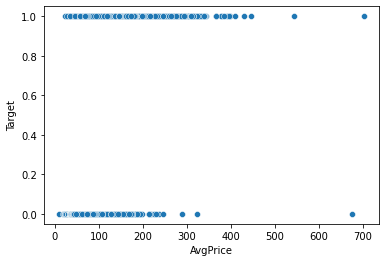

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(x='AvgPrice', y=df['Target'], data=X_test)

<AxesSubplot:xlabel='AvgPrice', ylabel='Target2'>

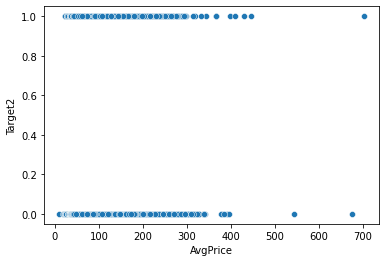

In [74]:
sns.scatterplot(x='AvgPrice', y=df['Target2'],palette='hls', data=X_test)

# Используя понижение размерности PCA пробуем рисовать с учетом Target и Target2
*https://www.machinelearningmastery.ru/pca-using-python-scikit-learn-e653f8989e60/*

## for Target

In [77]:
from sklearn.preprocessing import StandardScaler
features = ['DeviceCategory', 'PremiumPDPPercentage', 'PremiumCategoryPagePercentage', 'FilteredBrand', 'AvgPrice', 'MinPrice', 'PremiumInCart', 'PDPContain35']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf

,principal component 1,principal component 2,Target
0,-0.031403,0.336451,0
1,-1.664381,-0.542398,0
2,3.932801,-0.358014,1
3,-0.379234,-0.367377,0
4,5.809294,-1.943322,1
...,...,...,...
15888,1.122468,0.392875,0
15889,-1.678077,-0.533931,0
15890,-0.601967,-0.866860,0
15891,-1.450797,0.744604,0


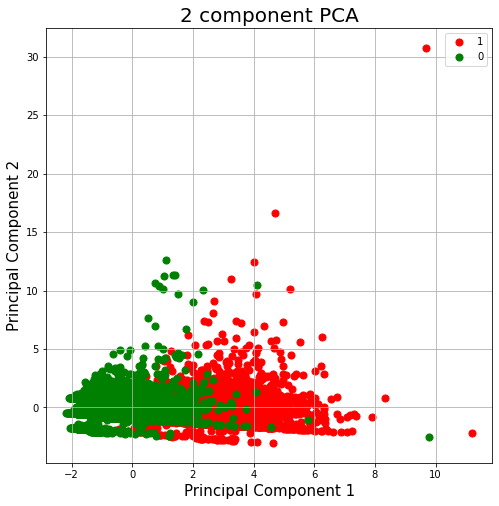

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

## for Target2

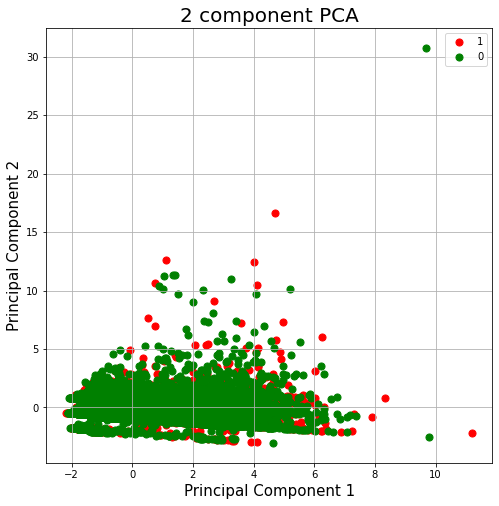

In [79]:
from sklearn.preprocessing import StandardScaler
features = ['DeviceCategory', 'PremiumPDPPercentage', 'PremiumCategoryPagePercentage', 'FilteredBrand', 'AvgPrice', 'MinPrice', 'PremiumInCart', 'PDPContain35']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target2']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Target2']]], axis = 1)
finalDf

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()